# How to Calculate Greenhouse Gas Growth Rates using Python

***

### Overview:

This How-To demonstrates how to calculate the growth rate, also known as rate of change, for greenhouse gases. This example uses atmospheric carbon dioxide data from OCO-2 (OCO2_L2_LITE_FP v11.1r) and the time series is computed using Python. The rate of change is computed by taking the difference of the area averaged concentrations.

### Example:

**Example data:** OCO2 L2 Lite v11.1r product ([OCO2_L2_Lite_FP](https://disc.gsfc.nasa.gov/datasets/OCO2_L2_Lite_FP_11.1r/summary?keywords=OCO2_L2_Lite_FP_11.1r))

**Example variable used:** XCO2

**Estimated time to complete procedure:** 20min


### Prerequisites

This notebook was written using Python 3.9, and requires these libraries and files: 
- [Pandas](https://pandas.pydata.org/)
- [Matplotlib](http://matplotlib.org/)
- CSV file containing the Methane data, generated in the first procedure step

The first step is to import the required Python libraries. If any of the following import commands fail, check the local Python environment and install any missing packages. These lines will be necessary to run the rest of the cells:

In [14]:
import os, sys
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
datetime #chris code for timesteps

Read in the data and recognize the data as dates and numeric values and calculate the month-to-month growth rates of methane concentration:

In [15]:
# Read in data
fid = nc.Dataset('new.nc')

xco2 = fid.variables['xco2'][:]
lat = fid.variables['lat'][:]
lon = fid.variables['lon'][:]
time = fid.variables['time'][:]

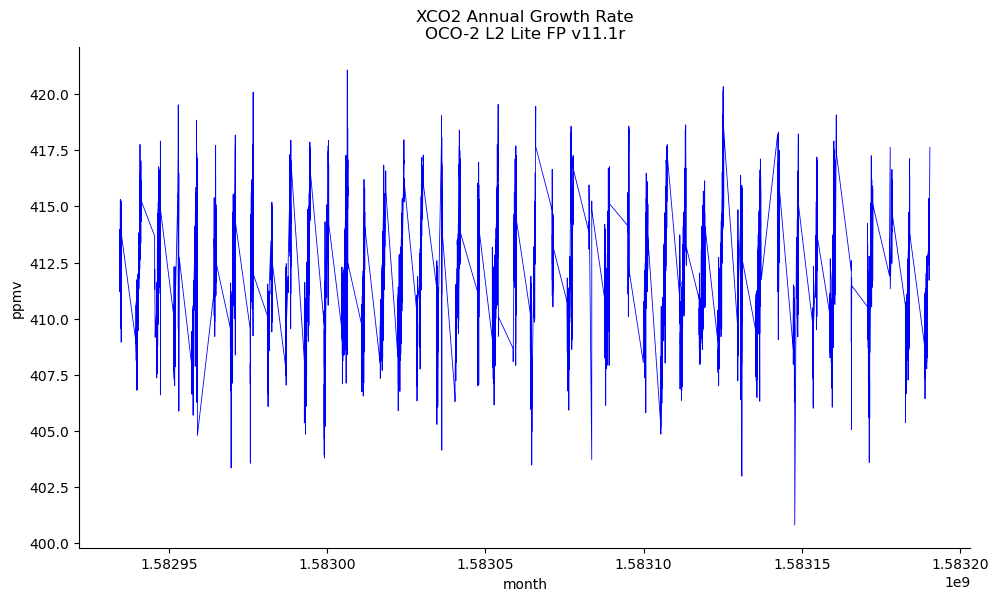

In [30]:
ttl = "XCO2 Annual Growth Rate\nOCO-2 L2 Lite FP v11.1r"

#datefmt = df.DateFormatter("%b-%y")
fig, ax = plt.subplots()
fig.set_size_inches(11.5, 6.5)

# Plot the dates and calculated XCO2 growth rates
ax.plot(time, xco2,linewidth=0.6,color='blue')
#ax.xaxis.set_major_formatter(datefmt)

# Add axes labels and graph title
ax.set(xlabel="month", ylabel="ppmv")
ax.set(title=ttl)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

'''plt.hlines(0,'2000-1-1', '2024-1-1', linestyle='dashed', linewidth=0.6)
plt.ylim(350, 420)
plt.xlim('2000-1-1', '2024-1-1')
plt.xticks(['2000-1-1', '2024-1-1'],rotation=70)
#plt.yticks([-20, -10, 0, 10, 20])
ax.xaxis.set_major_locator(df.MonthLocator(interval=6))'''

figure1 = plt.figure(1)

Plot the month-to-month growth rates calculated in the previous cell:

In [ ]:
ttl = "AIRS CH4 monthly growth rate at 500 hPa for Northern Hemisphere"

# Format the dates and change the image size
datefmt = df.DateFormatter("%b-%y")
fig, ax = plt.subplots()
fig.set_size_inches(11.5, 6.5)

# Plot the dates and calculated CH4 growth rates
ax.plot(data['Time'].values, data['Mean AIRS Methane'].values,linewidth=0.6,color='blue')
ax.xaxis.set_major_formatter(datefmt)

# Add axes labels and graph title
ax.set(xlabel="month", ylabel="CH4 growth rate (ppb/month)")
ax.set(title=ttl)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add center line and format x and y axis ticks
plt.hlines(0,'2003-1-1', '2016-7-1', linestyle='dashed', linewidth=0.6)
plt.ylim(-20, 20)
plt.xlim('2003-1-1', '2016-7-1')
plt.xticks(['2003-1-1', '2016-7-1'],rotation=70)
plt.yticks([-20, -10, 0, 10, 20])
ax.xaxis.set_major_locator(df.MonthLocator(interval=6))

figure1 = plt.figure(1)

Save the figure as a PNG:

In [ ]:
figure1.savefig('AIRS_CH4_mon_500hpa.png', format='png', dpi=360)

**Figure 1.** AIRS methane month-to-month growth rate at 500 hPa.

*** 

- Yearly growth rates can be calculated by taking the monthly methane concentrations for a given month, and subtracting the methane concentration from the same month the year before (Figure 2).

    1. Example: the yearly growth rate for January 2005 would be the methane concentration for January 2005 minus January 2004 over the change in time. This will produce units of ppb/year. (method from Rigby et al. 2008, Geophysical Research Letters; Simpson et al. 2006,Geophysical Research Letters).

Read in the data and recognize the data as dates and numeric values and calculate the yearly growth rates of methane concentration:

In [ ]:
# Read in data
data = pd.read_csv("g4.areaAvgTimeSeries.AIRX3STM_006_CH4_VMR_A.500hPa.20020901-20160930.180W_90S_180E_90N.csv", skiprows=9, usecols=[0,1], names=['Time','Mean AIRS Methane'])

# Read the times as dates and the methane concentrations as numeric values
data['Time'] = pd.to_datetime(data['Time'])
data['Mean AIRS Methane'] = pd.to_numeric(data['Mean AIRS Methane'])

# Restrict the range and calculate the month-to-month growth rates
dateRange = (data['Time'] >= '2004-1-1') & (data['Time'] <= '2016-7-1') # The range of dates being calculated
calcRange = (data['Time'] >= '2003-1-1') & (data['Time'] <= '2015-7-1') # The range including the previous year for calculations
range1data = data.loc[dateRange]
range2data = data.loc[calcRange]
valuesRange1 = range1data['Mean AIRS Methane'].values
valuesRange2 = range2data['Mean AIRS Methane'].values
subtractedMonthly = valuesRange1
subtractedMonthly = [x-y for x, y in zip(valuesRange1, valuesRange2)]   
data = data.loc[dateRange]
data['Mean AIRS Methane'] = subtractedMonthly

Plot the yearly growth rates calculated in the previous cell:

In [ ]:
ttl = "AIRS CH4 yearly growth rate at 500hPa for Northern Hemisphere"

# Format the dates and change the image size
datefmt = df.DateFormatter("%b-%y")
fig, ax = plt.subplots()
fig.set_size_inches(11.5, 6.5)

# Plot the dates and calculated CH4 growth rates
ax.plot(data['Time'].values, data['Mean AIRS Methane'].values,linewidth=0.6,color='blue')
ax.xaxis.set_major_formatter(datefmt)

# Add axes labels and graph title
ax.set(xlabel="month", ylabel="CH4 growth rate (ppb/year)")
ax.set(title=ttl)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add center line and format x and y axis ticks
plt.hlines(0,'2004-1-1', '2016-7-1', linestyle='dashed', linewidth=0.6)
plt.ylim(-20, 20)
plt.xlim('2004-1-1', '2016-7-1')
plt.xticks(rotation=70)
plt.yticks([-20, -10, 0, 10, 20])
ax.xaxis.set_major_locator(df.MonthLocator(interval=6))

figure2 = plt.figure(1)

Save the figure as a PNG:

In [ ]:
figure2.savefig('AIRS_CH4_yr_500hpa.png', format='png', dpi=360)

**Figure 2.** AIRS methane yearly growth rate at 500hPa.

***

- Seasonal growth rates can be calculated using the "Time Series: Seasonal" service to compute area averaged concentrations for each season. Season-to-season or yearly seasonal growth rates could then be computed as described above.

<font size="1">THE SUBJECT FILE IS PROVIDED "AS IS" WITHOUT ANY WARRANTY OF ANY KIND, EITHER EXPRESSED, IMPLIED, OR STATUTORY, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTY THAT THE SUBJECT FILE WILL CONFORM TO SPECIFICATIONS, ANY IMPLIED WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, OR FREEDOM FROM INFRINGEMENT, ANY WARRANTY THAT THE SUBJECT FILE WILL BE ERROR FREE, OR ANY WARRANTY THAT DOCUMENTATION, IF PROVIDED, WILL CONFORM TO THE SUBJECT FILE. THIS AGREEMENT DOES NOT, IN ANY MANNER, CONSTITUTE AN ENDORSEMENT BY GOVERNMENT AGENCY OR ANY PRIOR RECIPIENT OF ANY RESULTS, RESULTING DESIGNS, HARDWARE, SOFTWARE PRODUCTS OR ANY OTHER APPLICATIONS RESULTING FROM USE OF THE SUBJECT FILE. FURTHER, GOVERNMENT AGENCY DISCLAIMS ALL WARRANTIES AND LIABILITIES REGARDING THIRD-PARTY SOFTWARE, IF PRESENT IN THE SUBJECT FILE, AND DISTRIBUTES IT "AS IS."